## Recreating images with a piece of string

The goal of this work is to take some image, and try to recreate it with an imagined circular board of nails, and a single thread of string.

First we can read in some target image, and represent this as a numpy matrix, in this case we will read in the image of a friendly bee! 🐝

In [27]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def image_to_numpy_matrix(input_image_path, output_size=(500, 500)):
    image = Image.open(input_image_path)
    grayscale_image = image.convert('L')
    resized_image = grayscale_image.resize(output_size)
    numpy_image = np.array(resized_image) / 255
    return numpy_image

# Example usage
ORIGINAL_IMAGE = 'bee.jpg'
target_matrix = image_to_numpy_matrix(ORIGINAL_IMAGE)

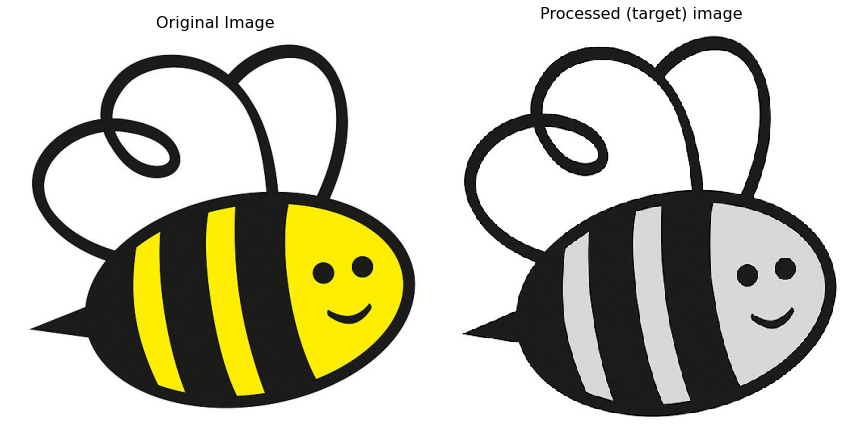

In [28]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image in the first subplot
axs[0].imshow(Image.open(ORIGINAL_IMAGE))
axs[0].set_title('Original Image', fontsize=16)
axs[0].axis('off')

# Display the resulting grid in the second subplot
axs[1].imshow(target_matrix, cmap='gray', interpolation='none')
axs[1].set_title('Processed (target) image', fontsize=16)
axs[1].axis('off')

plt.tight_layout()
plt.show()

We now have a target image that takes the form of a 500 x 500 matrix, each matrix entry represents a pixel in the image. A value of 0 corresponds to black, and value of 1 corresponds to white.

We can create a second matrix of the same dimension, and compare how close the two matrices are to each other. _How_ we compare the two is the crux of the model here.

Let's start with something simple - a matrix of random noise:

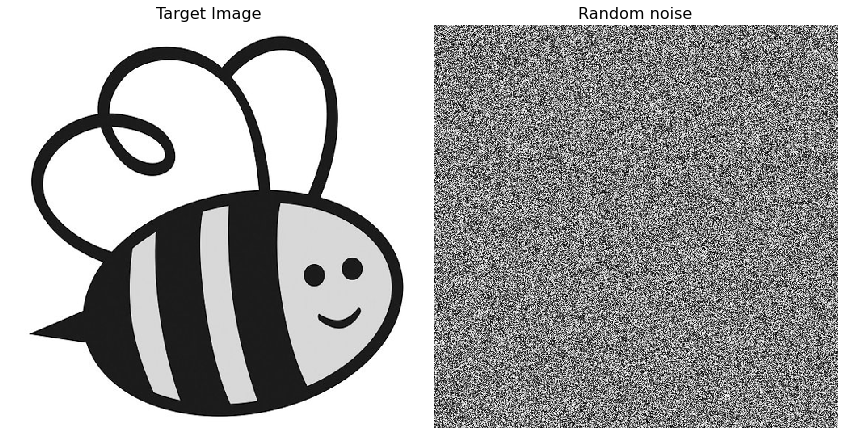

In [32]:
import numpy as np
from PIL import Image

# Assuming 'grid' is your NumPy matrix
random_matrix = np.random.random((500, 500))  # Replace this with your actual matrix

# Scale the values in the matrix to the range [0, 255] for display
scaled_random_matrix = (random_matrix * 255).astype(np.uint8)

# Create a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image in the first subplot
axs[0].imshow(target_matrix, cmap='gray', interpolation='none')
axs[0].set_title('Target Image', fontsize=16)
axs[0].axis('off')

# Display the resulting grid in the second subplot
axs[1].imshow(scaled_random_matrix, cmap='gray', interpolation='none')
axs[1].set_title('Random noise', fontsize=16)
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [53]:
((target_matrix - random_matrix)**2).mean()

0.28603820570718697

Since each pixel represents a numeric value, our first metric to evaluate how well our created image matches our target image can simply bee 🐝 taking the mean squared error between the two matrices.

That is, we have a Target matrix $T$ (the image of the bee):
$$
T = \begin{bmatrix}
    t_{11} & t_{12} & \ldots & t_{1m} \\
    t_{21} & t_{22} & \ldots & t_{2m} \\
    \vdots & \vdots & \ddots & \vdots \\
    t_{n1} & t_{n2} & \ldots & t_{nm}
\end{bmatrix}
$$

And a generated matrix A (currently just random noise)
$$
A = \begin{bmatrix}
    a_{11} & a_{12} & \ldots & a_{1m} \\
    a_{21} & a_{22} & \ldots & a_{2m} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n1} & a_{n2} & \ldots & a_{nm}
\end{bmatrix}
$$


To compare how 'close' the two matrices are we will do the following: 
$$
\text{MSE} = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}(T_{ij} - A_{ij})^2
$$

The MS job will be to minimise the $MSE$, where $0≤MSE≤1$.

Comparing the image of the bee with the random noise, we get an MSE of 0.29. This is reflects the MSE when we are just randomly guessing pixels, so is a handy benchmark for later.

Next we need to plot N points in a circle, connect them with lines, and then interpret how the lines that are drawn affect a 500 x 500 grid of pixels superposed ontop of it..

First let's draw the circle and a bunch of random connections:

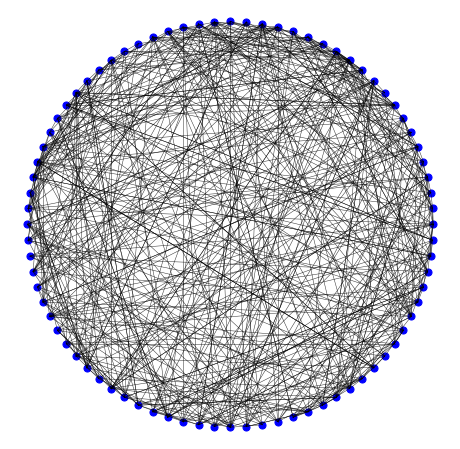

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import random

def draw_circle_with_nodes_and_connections(N, num_connections):
    # Generate N equally spaced points on the circumference of the circle
    theta = np.linspace(0, 2*np.pi, N, endpoint=False)
    x = np.cos(theta)
    y = np.sin(theta)

    # Plot the circle
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, color='blue', s=50)

    # Generate random connections between dots on the circle
    for _ in range(num_connections):
        # Randomly select two indices for the connection
        idx1, idx2 = random.sample(range(N), 2)
        plt.plot([x[idx1], x[idx2]], [y[idx1], y[idx2]], color='black', alpha=0.8, linewidth=0.5)

    # Set the aspect ratio to be equal, making the circle circular
    plt.axis('equal')

    # Remove axes
    plt.axis('off')

    # Show the plot
    plt.show()

# Number of sections (dots) on the circumference
N = 80

# Number of random connections to be drawn
num_connections = 500

# Draw circle with nodes and connections
draw_circle_with_nodes_and_connections(N, num_connections)


Next we'll need to translate these lines to a matrix like before. Not really sure how to do this 🤔